In [63]:
import numpy as np
import pandas as pd

from datetime import datetime
from sklearn.model_selection import train_test_split

from matplotlib import pyplot
import matplotlib.pyplot as plt

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
path = '/content/drive/MyDrive/Colab Notebooks/DACON CUP'

train_df = pd.read_csv(path + '/open_data/train.csv', encoding = 'euc-kr')
train_df.head()

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2018-09-09 00:00:00,19,19,8,206
1,2018-09-09 01:00:00,20,19,9,259
2,2018-09-09 02:00:00,12,9,1,48
3,2018-09-09 03:00:00,10,10,2,102
4,2018-09-09 04:00:00,6,5,3,18


In [66]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19008 entries, 0 to 19007
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  19008 non-null  object
 1   사용자       19008 non-null  int64 
 2   세션        19008 non-null  int64 
 3   신규방문자     19008 non-null  int64 
 4   페이지뷰      19008 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 742.6+ KB


In [67]:
# date 기준으로.

train_df['DateTime'] = pd.to_datetime(train_df.DateTime) #dtype: datetime으로 변경
train_df['date'] = train_df.DateTime.dt.date
train_df  = train_df.groupby('date').sum().reset_index()
train_df.head()

,date,사용자,세션,신규방문자,페이지뷰
0,2018-09-09,281,266,73,1826
1,2018-09-10,264,247,51,2092
2,2018-09-11,329,310,58,1998
3,2018-09-12,300,287,45,2595
4,2018-09-13,378,344,50,3845


In [68]:
# date 기준 변수 만들기



def create_features(df):
    """
    Creates time series features from datetime index
    """
    # df['DateTime'] = df.index
    # df['hour'] = df['date'].dt.hour
    df['dayofweek'] = pd.to_datetime(df['date']).dt.dayofweek #요일
    df['quarter'] = pd.to_datetime(df['date']).dt.quarter 
    df['month'] = pd.to_datetime(df['date']).dt.month
    df['year'] = pd.to_datetime(df['date']).dt.year # 날짜의 해당 연도 시작에서부터의 일 수를 반환 
    df['dayofyear'] = pd.to_datetime(df['date']).dt.dayofyear
    df['dayofmonth'] = pd.to_datetime(df['date']).dt.day
    df['weekofyear'] = pd.to_datetime(df['date']).dt.weekofyear
    
    X = df[['사용자','세션','신규방문자','페이지뷰','date','dayofweek','quarter','month','year' #]]
           ,'dayofyear','dayofmonth','weekofyear']]
    X.set_index('date', inplace = True)
    X.index = pd.to_datetime(X.index)
    return X

In [69]:
train = create_features(train_df)
train

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


,사용자,세션,신규방문자,페이지뷰,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
date,,,,,,,,,,,
2018-09-09,281,266,73,1826,6,3,9,2018,252,9,36
2018-09-10,264,247,51,2092,0,3,9,2018,253,10,37
2018-09-11,329,310,58,1998,1,3,9,2018,254,11,37
2018-09-12,300,287,45,2595,2,3,9,2018,255,12,37
2018-09-13,378,344,50,3845,3,3,9,2018,256,13,37
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-04,4516,4472,1196,112683,2,4,11,2020,309,4,45
2020-11-05,4155,4037,1044,102901,3,4,11,2020,310,5,45
2020-11-06,3663,3576,825,88015,4,4,11,2020,311,6,45


In [70]:
# len(train['dayofyear'].unique())

##### EDA 

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_

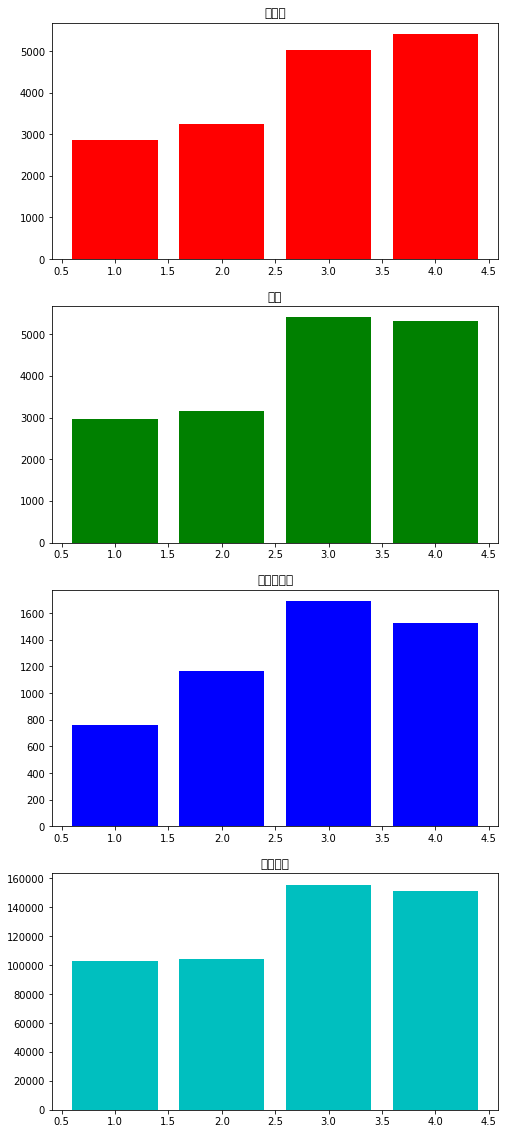

In [71]:
# quarter간에 차이가 있는지 확인

fig, axes = plt.subplots(4, 1, figsize=(8, 20))
axes[0].bar(train['quarter'], train['사용자'], color='r')
axes[1].bar(train['quarter'], train['세션'], color='g')
axes[2].bar(train['quarter'], train['신규방문자'], color='b')
axes[3].bar(train['quarter'], train['페이지뷰'], color='c')
for i, title in enumerate(['사용자','세션','신규방문자','페이지뷰']):
    axes[i].set_title(title)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49496 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49888 missing from current font.
  font.set_

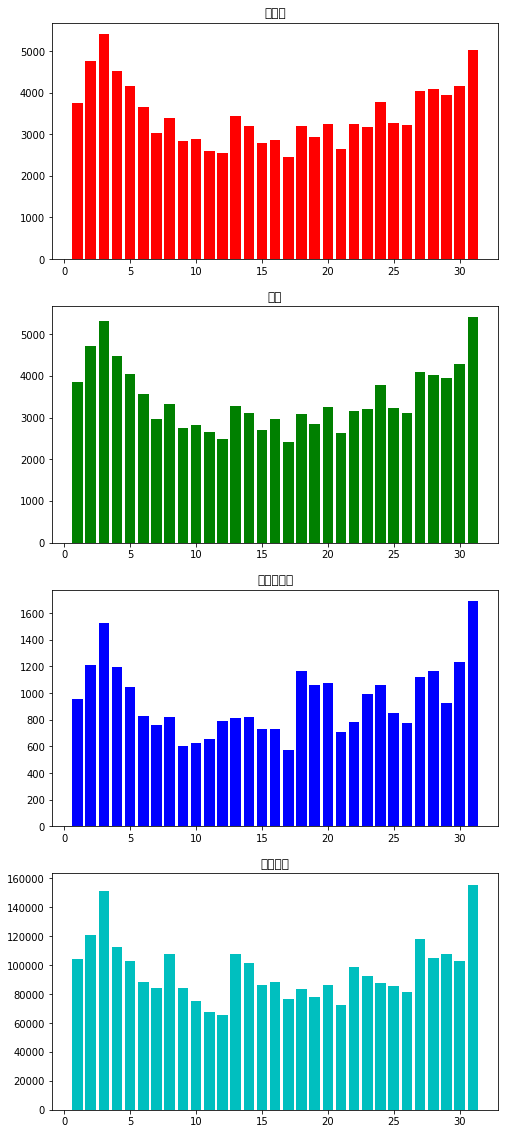

In [72]:
fig, axes = plt.subplots(4, 1, figsize=(8, 20))
axes[0].bar(train['dayofmonth'], train['사용자'], color='r')
axes[1].bar(train['dayofmonth'], train['세션'], color='g')
axes[2].bar(train['dayofmonth'], train['신규방문자'], color='b')
axes[3].bar(train['dayofmonth'], train['페이지뷰'], color='c')
for i, title in enumerate(['사용자','세션','신규방문자','페이지뷰']):
    axes[i].set_title(title)
plt.show()

#### 범주형 인코딩

- one-hot 인코딩: 카테고리가 별로 없는거
- binary 인코딩: 카테고리가 많은 거

In [73]:
pip install category_encoders

In [74]:
import category_encoders as ce

In [75]:
# bianry encoding

# dayofyear	dayofmonth	weekofyear

encoder = ce.BinaryEncoder(cols=['dayofyear'])
train = encoder.fit_transform(train)

encoder = ce.BinaryEncoder(cols=['dayofmonth'])
train = encoder.fit_transform(train)

encoder = ce.BinaryEncoder(cols=['weekofyear'])
train = encoder.fit_transform(train)

print(train.shape)
# train.head(3)

(792, 31)


/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [76]:
# one-hot encoding

def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis=1)
        data = data.drop(column, axis=1)
    return data


dummy_columns = ["dayofweek", "quarter", "month", "year"]
train = dummy_data(train,dummy_columns)

print(train.shape)
train.head(3)

(792, 53)


,사용자,세션,신규방문자,페이지뷰,dayofyear_0,dayofyear_1,dayofyear_2,dayofyear_3,dayofyear_4,dayofyear_5,dayofyear_6,dayofyear_7,dayofyear_8,dayofyear_9,dayofmonth_0,dayofmonth_1,dayofmonth_2,dayofmonth_3,dayofmonth_4,dayofmonth_5,weekofyear_0,weekofyear_1,weekofyear_2,weekofyear_3,weekofyear_4,weekofyear_5,weekofyear_6,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,quarter_1,quarter_2,quarter_3,quarter_4,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2018,year_2019,year_2020
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-09-09,281,266,73,1826,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2018-09-10,264,247,51,2092,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2018-09-11,329,310,58,1998,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


- 추가데이터 가공

In [77]:
'''
user =  pd.read_csv(path + '/open_data/info_user.csv', encoding = 'euc-kr')
login = pd.read_csv(path +'/open_data/info_login.csv', encoding = 'euc-kr')
competition = pd.read_csv(path +'/open_data/info_competition.csv', encoding = 'euc-kr')
info_submission =  pd.read_csv(path +'/open_data/info_submission.csv', encoding = 'euc-kr')
'''

"\nuser =  pd.read_csv(path + '/open_data/info_user.csv', encoding = 'euc-kr')\nlogin = pd.read_csv(path +'/open_data/info_login.csv', encoding = 'euc-kr')\ncompetition = pd.read_csv(path +'/open_data/info_competition.csv', encoding = 'euc-kr')\ninfo_submission =  pd.read_csv(path +'/open_data/info_submission.csv', encoding = 'euc-kr')\n"

- 데이터 전처리

In [78]:
# scaling

mini = train.iloc[:,:4].min()
size = train.iloc[:,:4].max() - train.iloc[:,:4].min()
train.iloc[:,:4] = (train.iloc[:,:4] -  mini) / size
train

,사용자,세션,신규방문자,페이지뷰,dayofyear_0,dayofyear_1,dayofyear_2,dayofyear_3,dayofyear_4,dayofyear_5,dayofyear_6,dayofyear_7,dayofyear_8,dayofyear_9,dayofmonth_0,dayofmonth_1,dayofmonth_2,dayofmonth_3,dayofmonth_4,dayofmonth_5,weekofyear_0,weekofyear_1,weekofyear_2,weekofyear_3,weekofyear_4,weekofyear_5,weekofyear_6,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,quarter_1,quarter_2,quarter_3,quarter_4,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2018,year_2019,year_2020
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-09-09,0.051689,0.049083,0.042604,0.011735,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2018-09-10,0.048551,0.045564,0.029586,0.013446,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2018-09-11,0.060550,0.057233,0.033728,0.012842,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2018-09-12,0.055197,0.052973,0.026036,0.016682,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2018-09-13,0.069596,0.063530,0.028994,0.024724,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-04,0.833487,0.828116,0.707101,0.724949,0,0,0,0,1,1,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2020-11-05,0.766845,0.747546,0.617160,0.662015,0,0,0,0,1,1,1,0,1,1,0,1,1,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2020-11-06,0.676020,0.662160,0.487574,0.566244,0,0,0,0,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [79]:
# scaling

input_window = 61
output_window = 61 # 7

window_x = np.zeros((train.shape[0] - (input_window + output_window), input_window, 53))
window_y = np.zeros((train.shape[0] - (input_window + output_window), output_window, 4))

for start in range(train.shape[0] - (input_window + output_window)):
    end = start + input_window    
    window_x[start,:, :] = train.iloc[start : end                , : ].values
    window_y[start,:, :] = train.iloc[end   : end + output_window, :4 ].values


print('window_x.shape: ', window_x.shape)
print('window_y.shape: ', window_y.shape)

window_x.shape:  (670, 61, 53)
window_y.shape:  (670, 61, 4)


In [80]:
# window_x

- 시계열 데이터 임베딩 찾아서 적용해보기
- 스케일링 다르게 해보기
- dropout 적용해보기

In [81]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential

from tensorflow.keras.layers import Dense, Conv1D, LSTM, Input, TimeDistributed
from tensorflow.keras.models import Model


optimizer = Adam, loss = mse, activation_function = 따로지정x

In [82]:
tf.random.set_seed(40)


model = Sequential()
model.add(LSTM(32, input_shape=(61, 53), return_sequences=True))  # (timestep, features)
model.add(LSTM(32, return_sequences=True)) 
model.add(LSTM(32, return_sequences=True)) 
# model.add(LSTM(32, return_sequences=True)) 
#model.add(LSTM(32, return_sequences=True)) 
# model.add(LSTM(32, return_sequences=True)) 
model.add(TimeDistributed(Dense(4)))

model.summary()

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt)

model.fit(window_x, window_y, epochs=100, batch_size=50)

# lstm2층 - epochs100, batch_size=10

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 61, 32)            11008     
_________________________________________________________________
lstm_7 (LSTM)                (None, 61, 32)            8320      
_________________________________________________________________
lstm_8 (LSTM)                (None, 61, 32)            8320      
_________________________________________________________________
time_distributed_2 (TimeDist (None, 61, 4)             132       
Total params: 27,780
Trainable params: 27,780
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
14/14 [==============================] - 5s 69ms/step - loss: 0.0390
Epoch 2/100
14/14 [==============================] - 1s 74ms/step - loss: 0.0099
Epoch 3/100
14/14 [==============================] - 1s 73ms/step - loss: 0.0077
Epoch

## test : last_df

In [83]:
# train은 이미 위에서 minmax scaler적용되어있음.

last_df = train.iloc[-61:,:].values[np.newaxis,...] # np.newaxis: 3D로 차원을 늘려줌. 
last_df.shape

(1, 61, 53)

In [84]:
pred_last = model.predict(last_df)
pred_last[:5]

array([[[0.6323428 , 0.63931376, 0.53155184, 0.6080047 ],
        [0.83255684, 0.85960394, 0.7967903 , 0.8164205 ],
        [0.5689576 , 0.56305397, 0.43490487, 0.47540036],
        [0.7076392 , 0.7024362 , 0.61545503, 0.6304507 ],
        [0.525041  , 0.506715  , 0.40688133, 0.41966543],
        [0.42346606, 0.4060568 , 0.32886475, 0.35305324],
        [0.3953928 , 0.38615674, 0.27615464, 0.33941633],
        [0.8102319 , 0.82174015, 0.72139496, 0.70533794],
        [0.7071923 , 0.71508795, 0.5524558 , 0.5835332 ],
        [0.7255676 , 0.7280625 , 0.5719272 , 0.5832016 ],
        [0.6305423 , 0.6274621 , 0.4668787 , 0.47574663],
        [0.5774025 , 0.57361126, 0.4054559 , 0.42986223],
        [0.42295906, 0.42890185, 0.29047704, 0.30205595],
        [0.40939632, 0.42180195, 0.2957052 , 0.29221526],
        [0.55798686, 0.57124543, 0.40289372, 0.43440917],
        [0.7042693 , 0.7237374 , 0.6165282 , 0.58384   ],
        [0.602489  , 0.6184504 , 0.449481  , 0.5072169 ],
        [0.658

In [85]:
pred_last = pred_last.reshape(output_window,4)
pred_last = pred_last * size[:4].values + mini[:4].values
pred_last = pred_last.astype(int)
pred_last


array([[  3426,   3452,    899,  94505],
       [  4510,   4642,   1347, 126900],
       [  3083,   3040,    735,  73894],
       [  3834,   3793,   1041,  97994],
       [  2845,   2736,    688,  65231],
       [  2294,   2193,    556,  54878],
       [  2142,   2085,    467,  52758],
       [  4390,   4437,   1220, 109634],
       [  3831,   3861,    934,  90702],
       [  3931,   3931,    967,  90650],
       [  3416,   3388,    790,  73948],
       [  3128,   3097,    686,  66816],
       [  2292,   2316,    491,  46951],
       [  2218,   2278,    500,  45421],
       [  3023,   3085,    681,  67523],
       [  3816,   3908,   1042,  90750],
       [  3264,   3340,    760,  78840],
       [  3569,   3630,    882,  85899],
       [  3011,   3065,    716,  67013],
       [  2814,   2799,    558,  69962],
       [  2651,   2625,    491,  59009],
       [  2906,   2888,    519,  61581],
       [  2642,   2642,    489,  52928],
       [  3123,   3153,    695,  66168],
       [  2916, 

In [86]:
pred_last.shape

(61, 4)

## submit

In [87]:
submission =  pd.read_csv(path + '/open_data/submission.csv', encoding = 'euc-kr')
submission.shape

(61, 5)

In [88]:
pred_last.shape

(61, 4)

In [89]:
pred_df = pd.DataFrame(pred_last)
pred_df.head()

,0,1,2,3
0,3426,3452,899,94505
1,4510,4642,1347,126900
2,3083,3040,735,73894
3,3834,3793,1041,97994
4,2845,2736,688,65231


In [90]:
# 30까지 모두 채우면 다시 0부터.

for i in range(len(submission)):
  submission['사용자'][i] = pred_df[0][i]
  submission['세션'][i] = pred_df[1][i]
  submission['신규방문자'][i] = pred_df[2][i]
  submission['페이지뷰'][i] = pred_df[3][i]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: Se

In [91]:
submission.head()

,DateTime,사용자,세션,신규방문자,페이지뷰
0,2020-11-09,3426,3452,899,94505
1,2020-11-10,4510,4642,1347,126900
2,2020-11-11,3083,3040,735,73894
3,2020-11-12,3834,3793,1041,97994
4,2020-11-13,2845,2736,688,65231


In [92]:
submission.to_csv('seed40_add 날짜feature.csv', index = False, encoding = 'euc-kr')

#### 결과 제일 좋았던, 나빴던 파일이랑 predict를 비교

In [93]:
best = pd.read_csv('61 lstm3.csv', encoding = 'euc-kr')
best.set_index('DateTime', inplace = True)
best.index = pd.to_datetime(best.index)
best.head()

FileNotFoundError: ignored

In [ ]:
worst = pd.read_csv('feature 추가 인코딩x.csv', encoding = 'euc-kr')
worst.set_index('DateTime', inplace = True)
worst.index = pd.to_datetime(best.index)
#worst.head()

In [ ]:
submission.set_index('DateTime', inplace = True)
submission.index = pd.to_datetime(submission.index)
# submission.head()

In [ ]:
# plot expected vs preducted


plt.figure(figsize = (15,7))
pyplot.plot(best['사용자'], label='best')
pyplot.plot(submission['사용자'], label='Predicted')
# pyplot.plot(worst['사용자'], label = 'worst')
pyplot.legend()
pyplot.show()

In [ ]:

plt.figure(figsize = (15,7))
pyplot.plot(best['세션'], label='best')
pyplot.plot(submission['세션'], label='Predicted')
pyplot.plot(worst['세션'], label = 'worst')
pyplot.legend()
pyplot.show()

In [ ]:

plt.figure(figsize = (15,7))
pyplot.plot(best['신규방문자'], label='best')
pyplot.plot(submission['신규방문자'], label='Predicted')
pyplot.plot(worst['신규방문자'], label = 'worst')
pyplot.legend()
pyplot.show()

In [ ]:

plt.figure(figsize = (15,7))
pyplot.plot(best['페이지뷰'], label='best')
pyplot.plot(submission['페이지뷰'], label='Predicted')
pyplot.plot(worst['페이지뷰'], label = 'worst')
pyplot.legend()
pyplot.show()

- 위에 잘 예측하지 못하는 부분들은 조금 튀는 값인 것 같음
- 해당 일자에 어떤 특징(개최된 대회 등)을 파악
- 이후 1) 제거 또는 2) 특징 적용  (추세파악과 관련없다면 제거하기)

## 참조

In [ ]:
# 각 변수의 크기가 다르기 때문에 가중치를 부여한 RMSE로 모델의 성능을 평가

def dacon_rmse(true, pred):
    # true.shape // (N,4)
    # pred.shape // (N,4)
    # w0, w1, w2, w3 <= train.csv의 사용자 수, 세션 수, 신규 방문자 수, 페이지 뷰 수 4가지 항목별 평균값
    score = np.sqrt(np.mean(np.square(true[:,0] - pred[:,0]))) / w0 +\
            + np.sqrt(np.mean(np.square(true[:,1] - pred[:,1]))) / w1 +\
            + np.sqrt(np.mean(np.square(true[:,2] - pred[:,2]))) / w2 +\
            + np.sqrt(np.mean(np.square(true[:,3] - pred[:,3]))) / w3 +\
     return score

In [ ]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

train_sc

In [ ]:
# date 기준 변수 만들기

from datetime import datetime

def create_features(df):
    """
    Creates time series features from datetime index
    """
    # df['DateTime'] = df.index
    # df['hour'] = df['date'].dt.hour
    df['dayofweek'] = pd.to_datetime(df['date']).dt.dayofweek
    df['quarter'] = pd.to_datetime(df['date']).dt.quarter
    df['month'] = pd.to_datetime(df['date']).dt.month
    df['year'] = pd.to_datetime(df['date']).dt.year
    df['dayofyear'] = pd.to_datetime(df['date']).dt.dayofyear
    df['dayofmonth'] = pd.to_datetime(df['date']).dt.day
    df['weekofyear'] = pd.to_datetime(df['date']).dt.weekofyear
    
    X = df[['사용자','세션','신규방문자','페이지뷰','date','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    X.set_index('date', inplace = True)
    X.index = pd.to_datetime(X.index)
    return X

## 예측값을 x로 다시 predict  
- 마이너스 값이 나와서 실패..

In [ ]:
tr_month1 = pd.DataFrame(pred_month)

In [ ]:
# 위 예측값을 x로 사용하기.
mini1 = tr_month1.iloc[:,1:].min()
size1 = tr_month1.iloc[:,1:].max() - tr_month1.iloc[:,1:].min()
tr_month1.iloc[:,1:] = (tr_month1.iloc[:,1:] -  mini1) / size1

tr_month1 = tr_month1.iloc[:,:].values[np.newaxis,...] # np.newaxis: 3D로 차원을 늘려줌. 
tr_month1.shape

In [ ]:
pred_month1 = model.predict(tr_month1)
pred_month1[:5]

In [ ]:
pred_month1 = pred_month1.reshape(output_window,4)
pred_month1 = pred_month1 * size.values + mini.values
pred_month1 = pred_month1.astype(int)
pred_month1


#### 윈도우 크기 다르게 해서 train하고 test해보기

aa

## test = train[-61]

In [ ]:
test = train[-61:]
test

In [ ]:
# scaling

input_window = 30
output_window = 30

test_x = np.zeros((test.shape[0] - (input_window + output_window), input_window, 4))
test_y = np.zeros((test.shape[0] - (input_window + output_window), output_window, 4))

for start in range(test.shape[0] - (input_window + output_window)):
    end = start + input_window    
    test_x[start,:, :] = test.iloc[start : end                , 1: ].values
    test_y[start,:, :] = test.iloc[end   : end + output_window, 1: ].values


print('test_x.shape: ', test_x.shape)
print('test_y.shape: ', test_y.shape)

In [ ]:
pred = model.predict(test_x)
pred[:5]

In [ ]:
pred = pred.reshape(output_window,4)
pred = pred * size.values + mini.values
pred = pred.astype(int)
pred

In [ ]:
pred.shape

In [ ]:
baseline = pd.read_csv(path + '/open_data/baseline.csv', encoding = 'euc-kr' )
baseline.head()

In [ ]:
last_month = train.iloc[-30:,1:].values[np.newaxis,...].astype(float) #float() # <- 수정 후
last_month

In [ ]:

#last_month = torch.tensor(window_x[-1,:,:][np.newaxis,...]).float().to(device) <- 수정 전
last_month = train.iloc[-30:,1:].values[np.newaxis,...] # <- 수정 후
# last_month = torch.tensor(last_month).float() # <- 수정 후

for start in range((len(submission) - output_window)//7 + 2):
    start = start * 7
    next_week = model.predict(last_month)
    #last_month = torch.cat([last_month[-7:], next_week], axis = 1) <- 수정 전
    last_month = torch.cat([last_month[:,7:,:], next_week], axis = 1)# <- 수정 후

    pred_week = next_week.reshape(output_window,4)
    pred_week = pred_week * size.values + mini.values
    pred_week = pred_week.astype(int)
    
    if start/7 == (len(submission) - output_window)//7 + 1:
        submission.iloc[start :, 1:] = pred_week[-submission.iloc[start :, 1:].shape[0]:,:]
    else:
        submission.iloc[start : start + output_window, 1:] = pred_week
submission